# Data-X Spring 2019: Homework 05

### Linear regression & Logistic regression



## Name: Isha Mangal

## SID: 3031911156




In this homework, you will do some exercises on prediction using sklearn. 

REMEMBER TO DISPLAY ALL OUTPUTS. If the question asks you to do something, make sure to print your results.


## Part 1 - Regression


### Data:
__Data Source__:
Data file is uploaded to bCourses and is named: __Energy.csv__ 
(Link in the Assignment details page on Bcourses) 

The dataset was created by Angeliki Xifara ( Civil/Structural Engineer) and was processed by Athanasios Tsanas, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

__Data Description__:

The dataset contains eight attributes of a building (or features, denoted by X1...X8) and response being the heating load on the building, y1. 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
*  X4	Roof Area 
*  X5	Overall Height 
* X6	Orientation 
*  X7	Glazing Area 
*  X8	Glazing Area Distribution 
*  y1	Heating Load 


#### Q1.1
Read the data file from the csv.

Print the count of NaN values for each attribute in the dataset.

Print the Range (min, max) and percentiles (25th, 50th, and 75th) of each attribute in the dataset

In [40]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
% matplotlib inline

energy = pd.read_csv("Energy.csv")

In [41]:
energy.isnull().any()

X1    False
X2    False
X3    False
X4    False
X5    False
X6    False
X7    False
X8    False
Y1    False
dtype: bool

In [42]:
print("There are no NaN values for each attribute.")

There are no NaN values for each attribute.


In [43]:
energy.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000


 __REGRESSION__:

Using the data, we want to predict "Heating load". The output variable is continuous. Hence, we need to use a regression algorithm.  

__Q 1.2:__ 

Split the dataset randomly into train and test. Train a **Linear Regression** model on 80% of the data (80-20 split).
What is the intercept and coefficient values?



In [44]:
from sklearn.model_selection import train_test_split

X, Y = energy.iloc[:,:-1], energy['Y1']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

from sklearn import linear_model
linearModel = linear_model.LinearRegression()
linearModel.fit(x_train, y_train)
2

print("Intercept:",linearModel.intercept_)
print("Coefficients:", linearModel.coef_)

Intercept: 86.7696900763
Coefficients: [ -6.53181921e+01  -6.52060264e-02   3.94797684e-02  -5.23428974e-02
   3.97785931e+00   3.95189299e-02   1.95726657e+01   1.04867340e-01]



#### Q.1.3: 

Create a function which takes arrays of prediction and actual values of the output as parameters to calculate **'Root Mean Square error'** (RMSE) metric:  

1. Use the function to calculate the training RMSE  
2. Use the function to calculate the test RMSE



In [45]:
def RMSE(y_pred, y_actual):
    return np.sqrt(((y_pred - y_actual) ** 2).mean())

print("Training RMSE:", RMSE(linearModel.predict(x_train), y_train))
print("Test RMSE:", RMSE(linearModel.predict(x_test), y_test))

Training RMSE: 2.86903994065
Test RMSE: 3.14462427336



#### Q1.4: 

Let's see the effect of amount of data on the performance of prediction model. Use varying amounts of data (100,200,300,400,500,all) from the training data you used previously to train different regression models. Report  training error and test error in each case. Test data  is the same as above for  all  these cases.

**Plot error rates vs number of training examples.** Both the training error and the test error should be plotted. Comment on the relationship you observe between the amount of data used to train the model and the test accuracy of the model.

__Hint:__ Use array indexing to choose varying data amounts

SIZE: 100
TRAINING ACCURACY: 0.936329566401
TEST ACCURACY: 0.904741840124

SIZE: 200
TRAINING ACCURACY: 0.926868489815
TEST ACCURACY: 0.898632810893

SIZE: 300
TRAINING ACCURACY: 0.927309388046
TEST ACCURACY: 0.903093534126

SIZE: 400
TRAINING ACCURACY: 0.924218972994
TEST ACCURACY: 0.905662352707

SIZE: 500
TRAINING ACCURACY: 0.918960762645
TEST ACCURACY: 0.9031484356

SIZE: 614
TRAINING ACCURACY: 0.918721812179
TEST ACCURACY: 0.903680668567



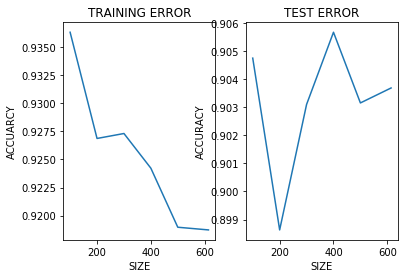

In [46]:
import matplotlib.pyplot as plt

train_sizes = [100,200,300,400,500, len(x_train)]
train_error = []
test_error = []
for s in train_sizes:
    linearModel = linear_model.LinearRegression()
    linearModel.fit(x_train.iloc[:s,:], y_train.iloc[:s])
    train_error.append(linearModel.score(x_train.iloc[:s,:], y_train.iloc[:s]))
    test_error.append(linearModel.score(x_test.iloc[:s,:], y_test.iloc[:s]))
    print("SIZE:",s)
    print("TRAINING ACCURACY:",train_error[-1])
    print("TEST ACCURACY:",test_error[-1])
    print()
    
plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_error)
plt.title("TRAINING ERROR")
plt.xlabel("SIZE")
plt.ylabel("ACCUARCY")
plt.subplot(1, 2, 2)
plt.plot(train_sizes, test_error)
plt.title("TEST ERROR")
plt.xlabel("SIZE")
plt.ylabel("ACCURACY")
plt.show()

## Part 2 - Classification


__CLASSIFICATION__:
LABELS ARE DISCRETE VALUES.

Here the model is trained to classify each instance into a set of predefined discrete classes. On inputting a feature vector into the model, the trained model is able to predict a class of that instance.


#### Q2.1
Bucket the values of 'y1' i.e 'Heating Load'  from the original dataset into 3 classes:

0: 'Low' ( < 14),   
1: 'Medium'  (14-28),   
2: 'High'  (>28)

**HINT:** Use pandas.cut

This converts the given dataset  into a classification problem. Use this dataset with transformed 'heating load' to create a **logistic regression** classifiction model that predicts heating load type of a building. Split the data randomly into training and test set. Train the model on 80% of the data (80-20 split).


In [47]:
import sys

energy['Y1_cut'] = pd.cut(energy['Y1'], 
                bins=[0,14,28, sys.maxsize], 
                include_lowest=True,
                labels=['Low', 'Medium', 'High'])

In [48]:
from sklearn.linear_model import LogisticRegression
x = energy.drop(['Y1', 'Y1_cut'], axis=1) 
y = energy['Y1_cut']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Q2.2 
- Print the training and test accuracies
- Print the confusion matrix
- Print the precision and recall numbers for all the classes


Training Accuracy:

In [49]:
model.score(x_train, y_train)

0.80293159609120524

Test Accuracy: 

In [50]:
model.score(x_test, y_test)

0.81818181818181823

Confusion Matrix: 

In [51]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[60,  0,  0],
       [ 0, 43,  6],
       [18,  4, 23]])

Precision number:

In [52]:
from sklearn.metrics import precision_score 
precision_score(y_test, y_pred, average = None)

array([ 0.76923077,  0.91489362,  0.79310345])

Recall number: 

In [53]:
from sklearn.metrics import recall_score 
recall_score(y_test, y_pred, average = None)

array([ 1.        ,  0.87755102,  0.51111111])

#### Q2.3
##### K Fold Cross Validation

 In k-fold cross-validation, the shuffled training data is partitioned into k disjoint sets and the model is trained on k −1 sets and validated on the kth set. This process is repeated k times with each set chosen as the validation set once. The cross-validation accuracy is reported as the average accuracy of the k iterations
 
__Use 7-fold cross validation on the training data. Print the average accuracy__

In [54]:
from sklearn.model_selection import cross_val_score
linearModel = linear_model.LogisticRegression()
print("AVERAGE ACCURACY:",cross_val_score(linearModel,x_train,y_train).mean())

AVERAGE ACCURACY: 0.760771622565


__Q2.4__

One of the preprocessing steps in Data science is Feature Scaling i.e getting all our data on the same scale by setting same  Min-Max of feature values. 
This makes training less sensitive to the scale of features . 
Scaling is important in algorithms that use distance functions as a part of classification. If we Scale features in the range [0,1] it is called unity based normalization.

__Perform unity based normalization on the above dataset and train the model again, compare model performance in training and validation with your previous model.__  

refer:http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler  
more at: https://en.wikipedia.org/wiki/Feature_scaling

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
x_train, x_test, y_train, y_test = train_test_split(scaler.transform(X),y, test_size=0.2)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
 model.score(x_train, y_train), model.score(x_test, y_test)

(0.80944625407166126, 0.83116883116883122)

The training accuracy of the current model, .801, is slightly lower than that 
of the previous model, .811. On the other hand, the test accuracy of the current
model, .851, is significantly higher that that of the previous model, .786.